**Aerofit Treadmill Data Set**
About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('aerofit_treadmill.csv')

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.shape

(180, 9)

There are 180 rows and 9 coloumns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are no null Values Present In The Dataset.

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


*Total count of all columns is 180
*Age: Mean age of the customer is 28 years, half of the customer's mean age is
 26.
*Education: Mean Education is 15 with maximum as 21 and minimum as 12.
*Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
*Fitness: Average rating is 3.3 on a scale of 1 to 5.
*Miles: Average number of miles the customer walks is 103 with maximum distance
 travelled by most people is almost 115 and minimum is 21.
*Income (in $): Most customer earns around 58K annually, with maximum of 104K
 and minimum almost 30K.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


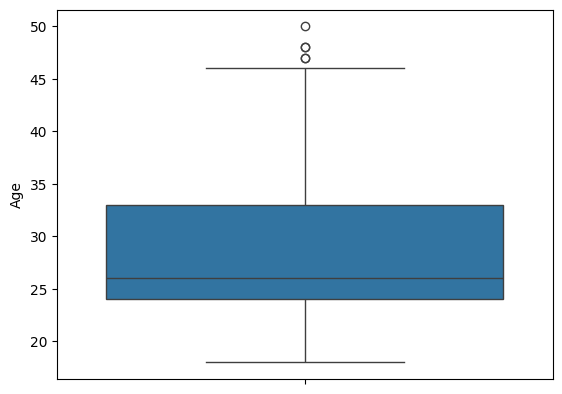

In [ ]:
sns.boxplot(data['Age'])
plt.show()

Data shows that Age Group Between 24 and 34 are keen towards fitness.
Age above 46 are outliers.

In [ ]:
data.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
data.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: count, Length: 180, dtype: int64

In [ ]:
total_uniq_age = data['Age'].nunique()
total_uniq_age

32

In [ ]:
# list of unique ages
data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
# Number of Male and Female customers
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
# list of unique Educations
data['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [ ]:
# Number of customer againts the rating scale 1 to 5
data['Fitness'].value_counts().sort_index()

,count
Fitness,
1,2
2,26
3,97
4,24
5,31


In [ ]:
# Number of customers with 3 different product types
data['Product'].value_counts().sort_index()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
# Number of customers counts on Usage
data['Usage'].value_counts().sort_index()

,count
Usage,
2,33
3,69
4,52
5,17
6,7
7,2


In [ ]:
# Number of Single and Partnered customers
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
df_cat = data
df_cat['Fitness_category'] = data.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [ ]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

<ipython-input-20-5f48e97e54b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat["Fitness_category"].replace({1:"Poor Shape",


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

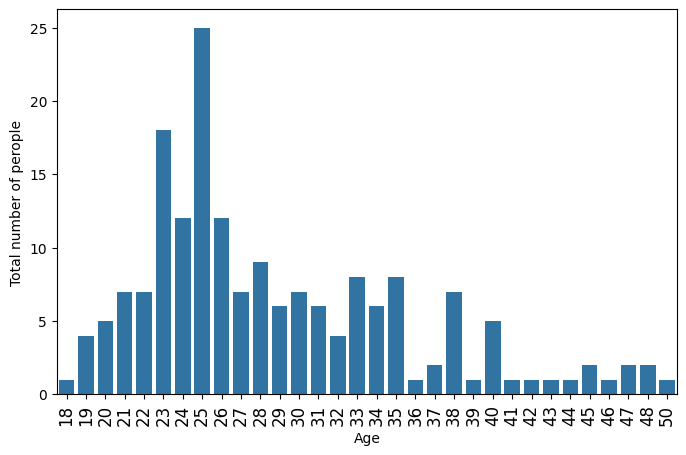

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data,x=data['Age'])
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('Total number of perople')
plt.show()

In [ ]:
data['Product'] = data['Product'].str.strip()
# checking empty strings
data[data['Product'] == '']


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category


In [ ]:
x = data.groupby(['Product','MaritalStatus'])['Age'].count().reset_index()
x.pivot(index = 'Product' , columns = 'MaritalStatus' , values = 'Age').sort_values('Single',ascending = False)

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


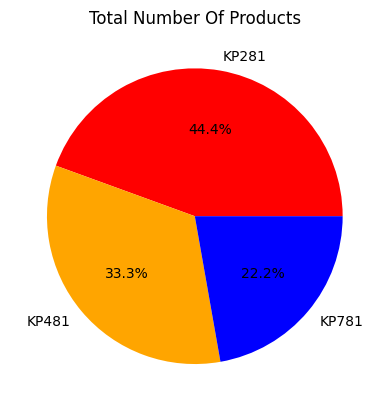

In [ ]:
types = data.Product.value_counts(normalize=True)
plt.pie(types, labels=types.index, autopct='%1.1f%%' , colors = ['red' , 'orange','blue'])
plt.title('Total Number Of Products')
plt.show()


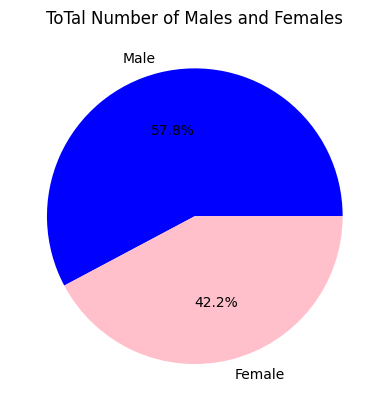

In [ ]:
types = data.Gender.value_counts(normalize=True)
plt.pie(types, labels=types.index, autopct='%1.1f%%' , colors = ['blue','pink'])
plt.title('ToTal Number of Males and Females')
plt.show()

*This shows That % of male is higher.

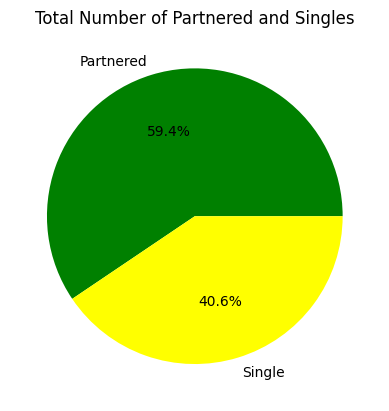

In [ ]:
types = data.MaritalStatus.value_counts(normalize=True)
plt.pie(types, labels=types.index, autopct='%1.1f%%' , colors = ['green','yellow'])
plt.title('Total Number of Partnered and Singles')
plt.show()

In [ ]:
usage = data['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [ ]:
rating = data['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Fitness,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


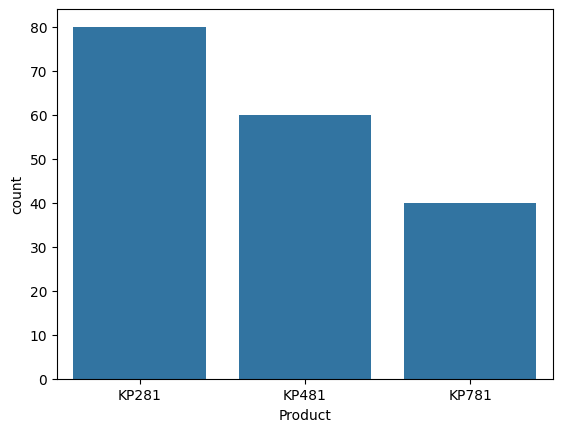

In [ ]:
sns.countplot(data=data,x='Product')
plt.show()

*This shows the count of these three products used.
*KP281 is most commonly used.

<Axes: xlabel='Income', ylabel='Count'>

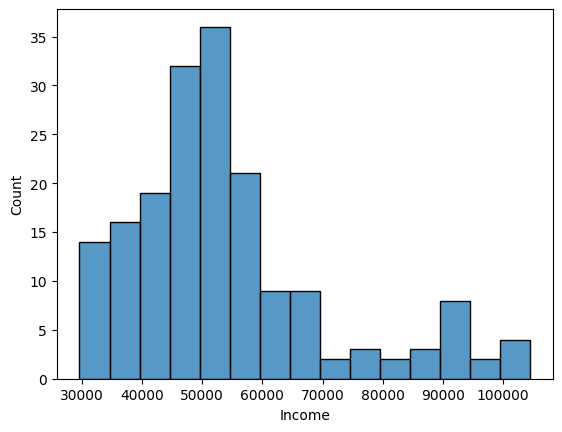

In [ ]:
sns.histplot(data=data,x='Income')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


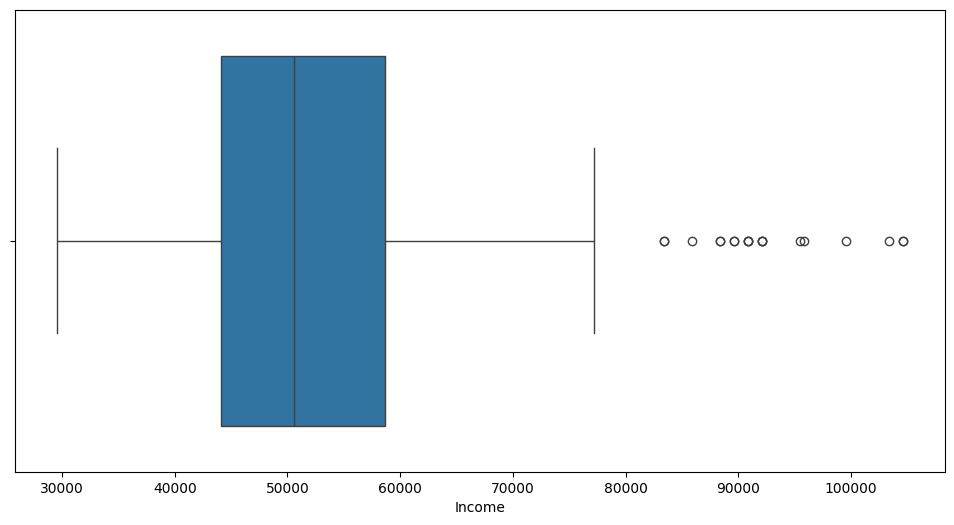

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Income')
plt.show()

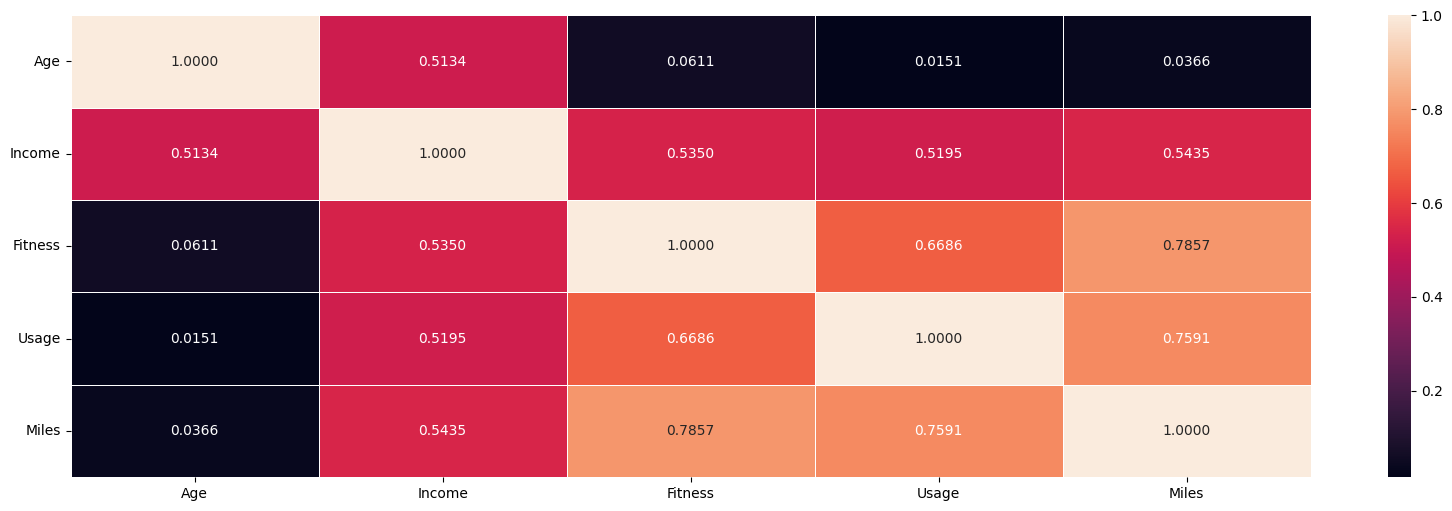

In [ ]:
df=data[['Age','Income','Fitness','Usage','Miles']]
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5)
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

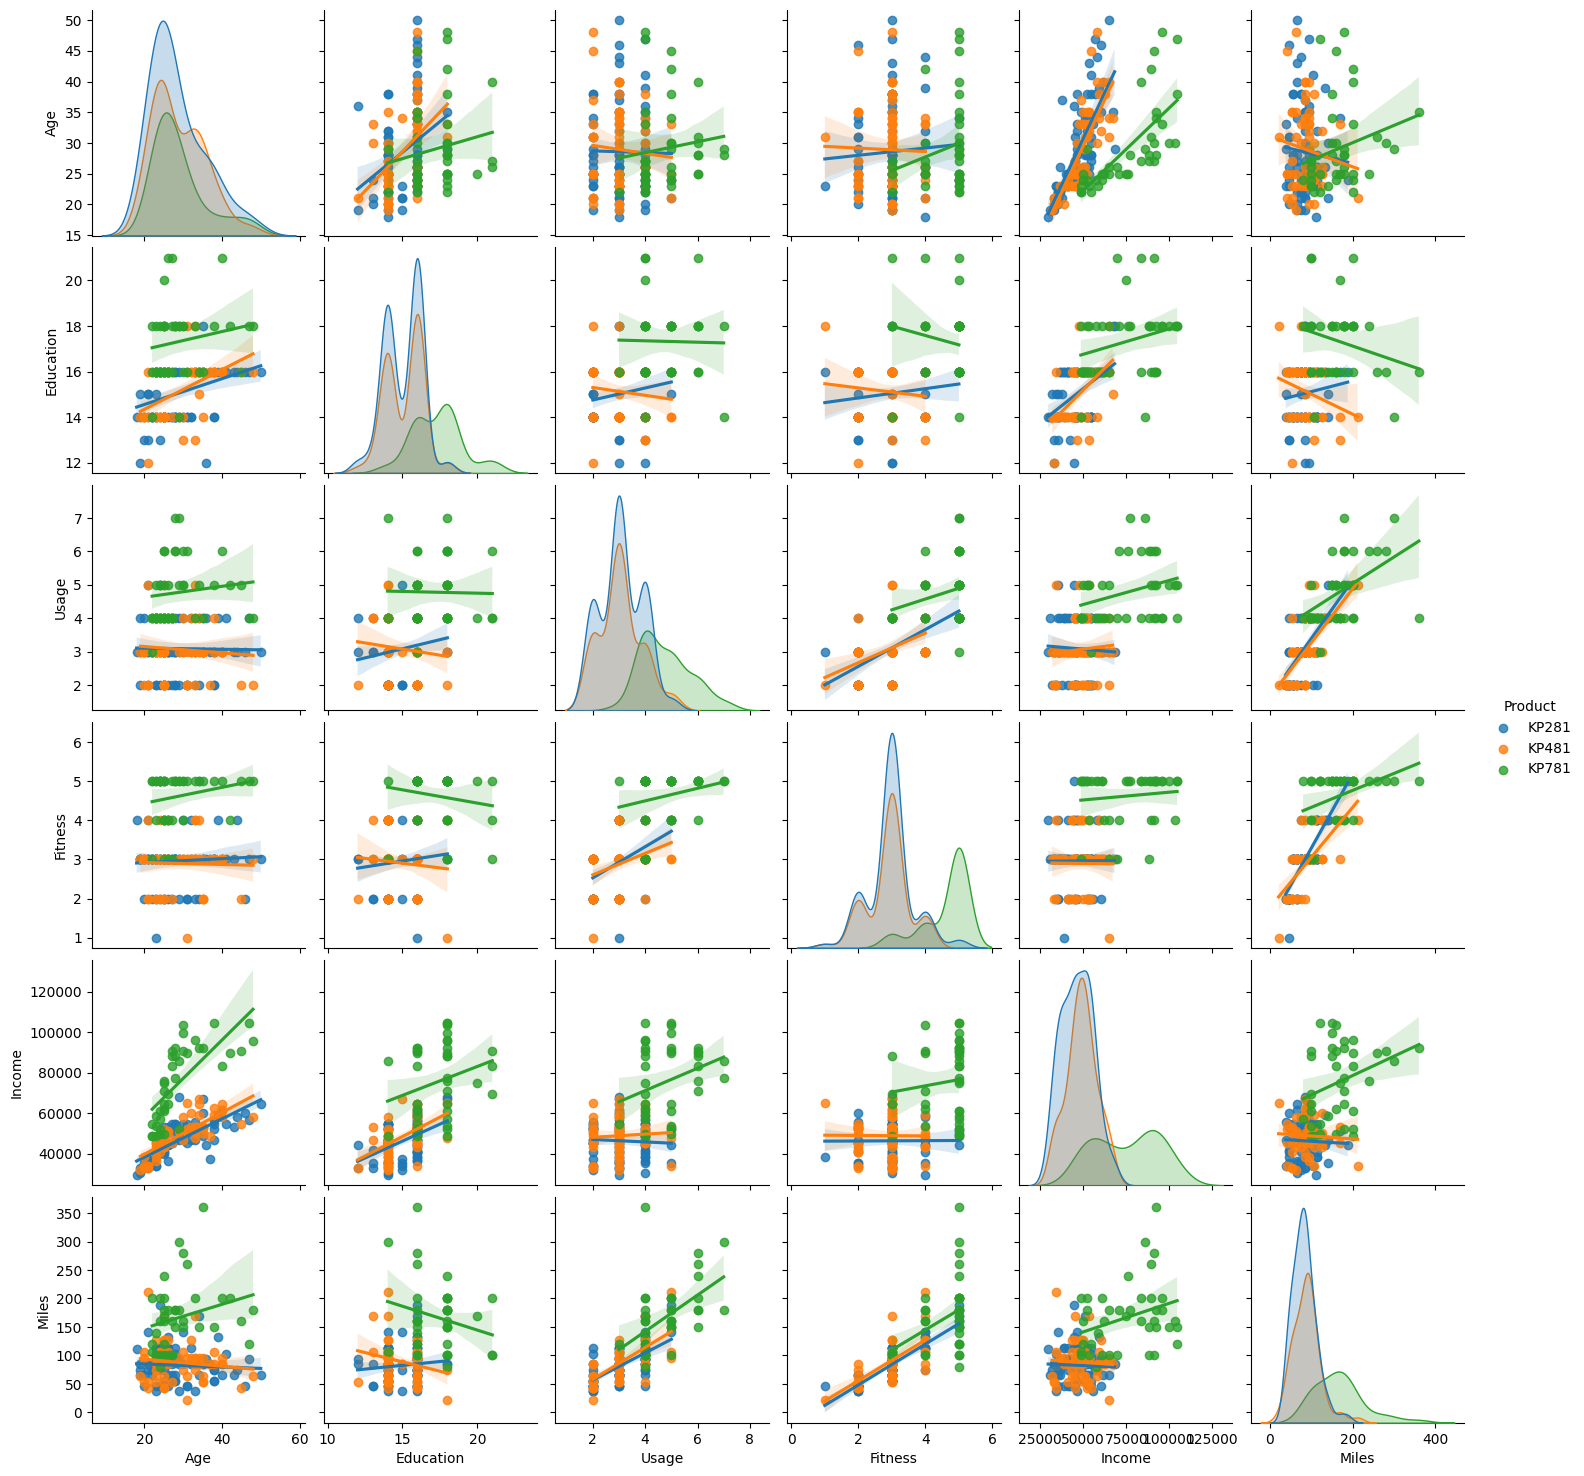

In [ ]:
sns.pairplot(data,hue='Product',kind='reg')
plt.show()

In [ ]:
# Average Age of customer using each product
data.groupby('Product')['Age'].mean()

,Age
Product,
KP281,28.55
KP481,28.90
KP781,29.10


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


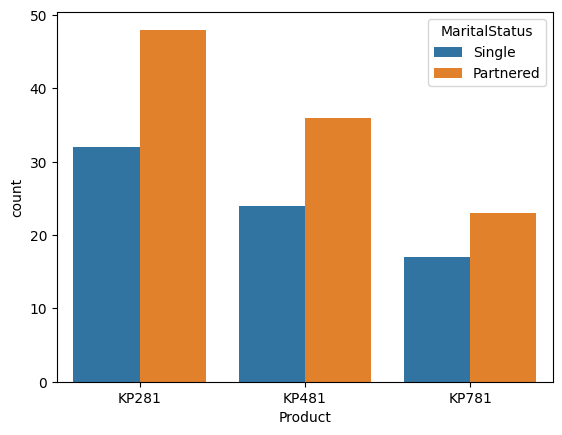

In [ ]:
sns.countplot(data=data,x='Product',hue='MaritalStatus')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


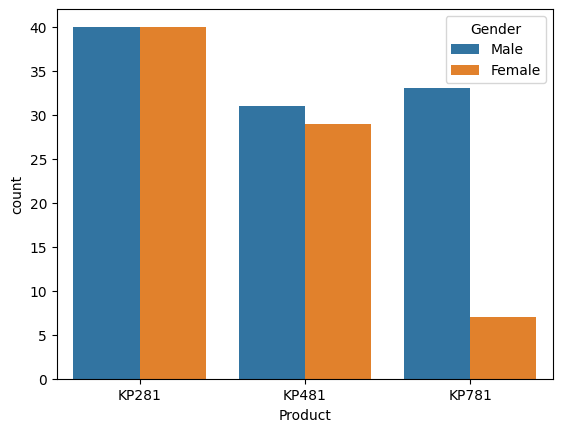

In [ ]:
# Product purchased among Male and Female
sns.countplot(data=data,x='Product',hue='Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


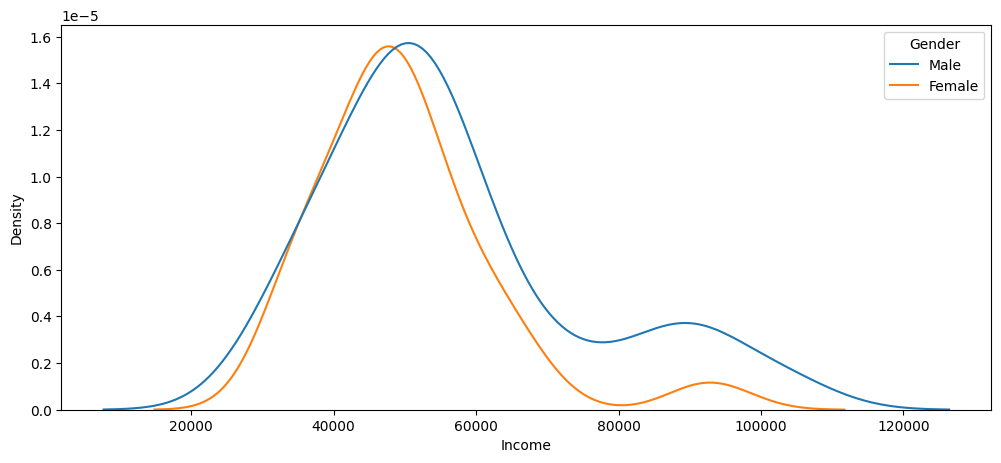

In [ ]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=data,x='Income',hue='Gender')
plt.show()

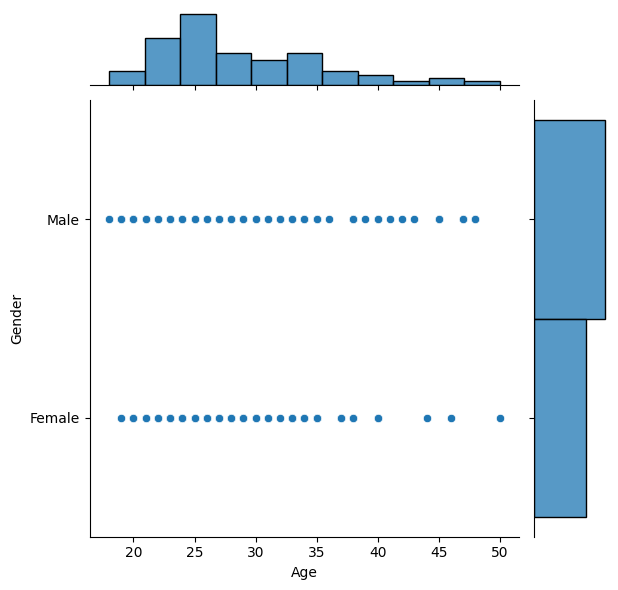

In [ ]:
sns.jointplot(x='Age',y='Gender',data=data)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


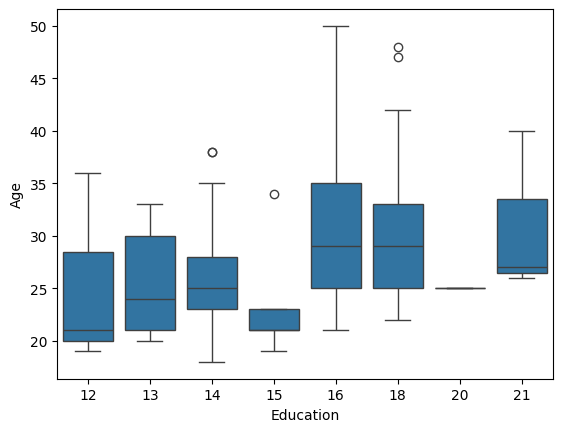

In [ ]:
sns.boxplot(x='Education',y='Age',data=data)
plt.show()

In [ ]:
q_75=np.percentile(df['Miles'],(75))
q_25=np.percentile(df['Miles'],(25))
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


In [ ]:
data.Product.value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


Probablity of Buying Product KP281 is 44.44%, KP481 is 33.33% and KP781 is 22.22%.

In [ ]:
data.Gender.value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


Probability Of Male Customer is 57.77% and That of Female is 42.22%

In [ ]:
data.MaritalStatus.value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


Probability Of Partnered is 59.44% and That Of Single is 40.55%

In [ ]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [ ]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df_cat.Age = pd.cut(df.Age,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,Teen,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,Teen,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,Teen,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,Teen,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,Teen,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [ ]:
df_cat.Age.value_counts()

,count
Age,
Adult,135
Middle Aged,22
Teen,17
Elder,6


In [ ]:
pd.crosstab(index=df_cat.Product,columns=df_cat.Age,margins=True)

Age,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [ ]:
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.Age,normalize=True,margins=True)*100,2)

Age,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [ ]:
round(pd.crosstab(index=df_cat["Product"],columns=df_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [ ]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [ ]:
np.round(((pd.crosstab(data.Product,data.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %

**KP281**

Easily affordable entry level product, which is also the maximum selling product.

KP281 is the most popular product among the entry level customers.



**KP481**

This is an Intermediate level Product.

KP481 is the second most popular product among the customers.


**KP781**

Due to the High Price & being the advanced type, customer prefers less of this product.

Customers use this product mainly to cover more distance.

**Recommendations**
Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes

Target the Age group above 40 years to recommend Product KP781.

Research required for expanding market beyond 50 years of age considering health pros and cons.